In [15]:
import random
import collections
import matplotlib.pyplot as plt

In [6]:
'''
Classic Linear Search Implementation
'''
def linearSearch(A, k):
  for i, entry in enumerate(A):
    if entry == k:
      return i
  return -1

## Assignment: Experimental Verification of Probabilities in Linear Search

### Assumptions:
Throughout this assignment, we’ll make the following assumption. There are **M** distinct array elements, all equally likely to be anywhere in the array.

Let’s write **pᵢ** to denote the probability that the earliest occurrence of the search key **K** is at index **i** of the array. Let **p₋₁** denote the probability that the search key **K** is not in the array at all.

We derive the following probabilities:

- For **i ∈ {0, . . . , n − 1}**, it holds that:

  \[
  p_i = (1 - \frac{1}{M})^i \cdot \frac{1}{M}
  \]

- Then, it holds that:

  \[
  p_{-1} = 1 - \sum_{i=0}^{n-1} p_i
  \]

### Task:
In this exercise, you will experimentally verify these formulas.

### Steps:

1. **Choose M:**  
   Select **M**, the number of distinct symbols. Choose a value that is not too large or too small, ideally in the range **5 to 20**.

2. **Choose Your Alphabet:**  
   Define an alphabet of **M distinct symbols**.  
   Example: If **M = 5**, the alphabet could be **{A, B, C, D, E}**.

3. **Choose a Search Key:**  
   Select one symbol from the alphabet as the **search key**. Keep this key **consistent** across all experiments.  
   Example: **K = 'A'**.

4. **Generate a Dataset:**  
   Choose several values for **n**, the array length. Suggested values:  
   **n ∈ {5, 10, 20, 50}**.  

   For each **n**, generate a large number of random arrays using your alphabet. Example Python code for **n = 5**:

   ```python
   import numpy as np
   np.random.choice(alph, 5)


1. **Choose M:**  
   Select **M**, the number of distinct symbols. Choose a value that is not too large or too small, ideally in the range **5 to 20**.

In [7]:
M = 15

2. **Choose Your Alphabet:**  
   Define an alphabet of **M distinct symbols**.  
   Example: If **M = 5**, the alphabet could be **{A, B, C, D, E}**.

In [8]:
alphabet = [i for i in range(M)]

3. **Choose a Search Key:**  
   Select one symbol from the alphabet as the **search key**. Keep this key **consistent** across all experiments.  
   Example: **K = 'A'**.

In [9]:
K = random.choice(alphabet)

4. **Generate a Dataset:**  
   Choose several values for **n**, the array length. Suggested values:  
   **n ∈ {5, 10, 20, 50}**.  

In [10]:
def genRandomArrays(n, alphabet):
  return [random.choice(alphabet) for _ in range(n)]

### (e) Perform Linear Search on the Dataset
- Run each array in your dataset through a **linear search** function to locate the search key **K**.
- Track the count of each distinct outcome.
- Use a **Python dictionary** for simplicity:

  ```python
  counts = {i: 0 for i in range(-1, n)}

In [12]:
def runSimulation(num_trials):

  # different sizes of n
  n = [5, 10, 20, 50]

  # for a given size of n, create random arrays
  data = collections.defaultdict(list)
  for i in n:
    for _ in range(1000):
      data[i].append(genRandomArrays(i, alphabet))

  counts = {}

  for size in n:
    # create a dictionary for each size
    counts[size] = collections.defaultdict(int)
    for i in range(num_trials):
      arr = data[size][i]
      counts[size][linearSearch(arr, K)] += 1

  return counts

In [13]:
num_trials = 1000
counts = runSimulation(num_trials)

In [19]:
def empFreqGen(counts, num_trials):
  #generate the empirical frequencies of finding at given i
  empirical_frequencies = {}
  for n, count_dict in counts.items():
      empirical_frequencies[n] = {i: count / num_trials for i, count in count_dict.items()}
  return empirical_frequencies

In [26]:
def theoreticalFrequencies(n,M):
  frequencies = {}
  for i in range(n):
    frequencies[i] = (1 - 1/M)**i * 1/M
  frequencies[-1] = 1 - sum(frequencies.values())
  return frequencies

In [27]:
def plotEmpiricalFrequencies(empirical_frequencies, M):
    for n, freq_dict in empirical_frequencies.items():
        indices = list(freq_dict.keys())
        frequencies = list(freq_dict.values())

        # compute theoretical probabilities
        theoretical_freqs = theoreticalFrequencies(n, M)
        theoretical_values = [theoretical_freqs[i] for i in indices]

        plt.figure(figsize=(8, 5))  # create a new figure for each n
        plt.plot(indices, frequencies, marker='o', label="Empirical Frequencies", linestyle='dashed')
        plt.plot(indices, theoretical_values, marker='x', label="Theoretical Probabilities", linestyle='solid')

        plt.xlabel("Index (i)")
        plt.ylabel("Probability")
        plt.yscale("log")  # use a logarithmic vertical scale for small probabilities
        plt.title(f"Comparison of Empirical & Theoretical Probabilities (n={n})")
        plt.legend()
        plt.grid(True)
        plt.show()

Plot the results:

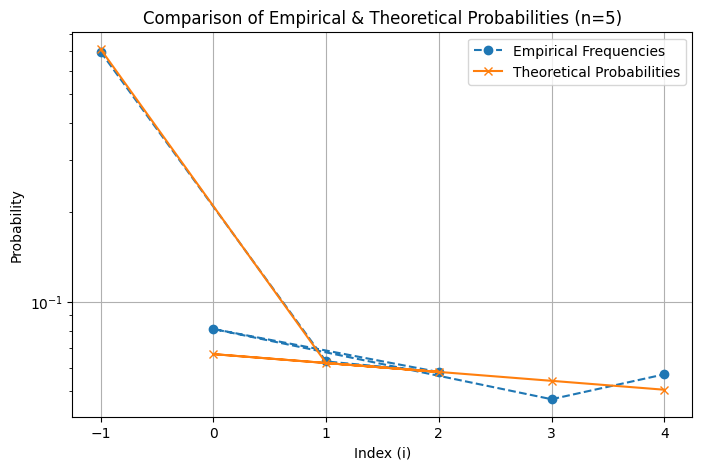

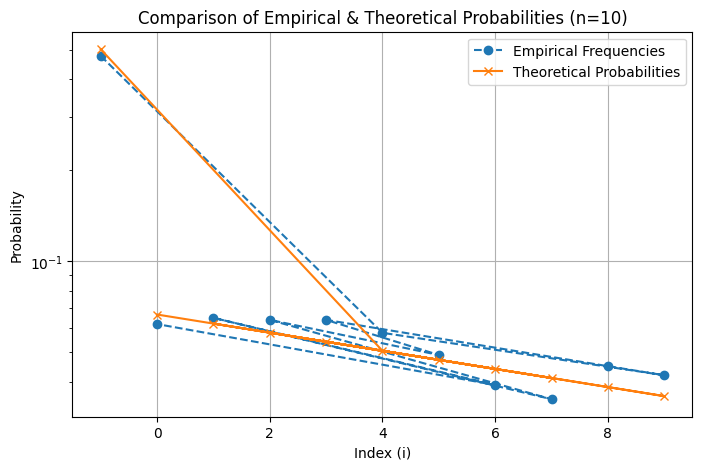

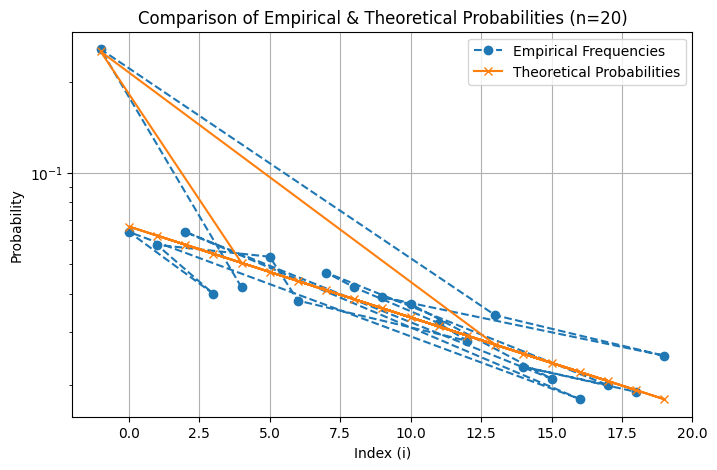

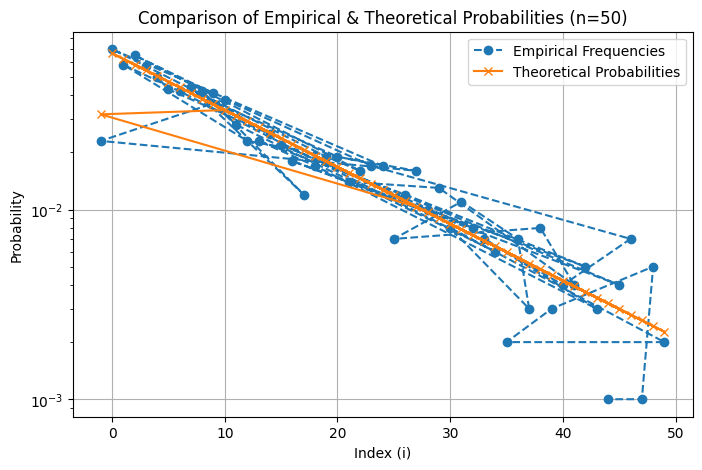

In [28]:
empirical_frequencies = empFreqGen(counts, num_trials)
plotEmpiricalFrequencies(empirical_frequencies, M)